In [4]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data=pd.read_excel("D:\YEAR2SEM2\DATA VISUALIZATION AND STORYTELLING\DATA VIZ\Mag6PlusEarthquakes_1900-2013.xlsx")
data.head(6)

<>:1: SyntaxWarning: invalid escape sequence '\Y'
<>:1: SyntaxWarning: invalid escape sequence '\Y'
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23892\3103554692.py:1: SyntaxWarning: invalid escape sequence '\Y'
  data=pd.read_excel("D:\YEAR2SEM2\DATA VISUALIZATION AND STORYTELLING\DATA VIZ\Mag6PlusEarthquakes_1900-2013.xlsx")


,time,Date,Time,Unnamed: 3,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type
0,2014-03-17T05:11:34.980Z,2014-03-17,05:11:34,NaN,-20.0030,-70.8741,17.0,6.2,mww,NaN,82.0,1.171,1.37,us,usc000ndw9,2014-03-17T14:57:11.000Z,"80km WNW of Iquique, Chile",earthquake
1,2014-03-16T21:16:30.770Z,2014-03-16,21:16:30,NaN,-19.9246,-70.6278,20.0,6.7,mww,NaN,44.0,0.929,1.16,us,usc000ndnj,2014-03-17T18:43:29.249Z,"60km WNW of Iquique, Chile",earthquake
2,2014-03-15T23:51:30.610Z,2014-03-15,23:51:30,NaN,-5.5660,-80.8790,9.8,6.3,mwp,NaN,90.0,6.253,1.00,us,usc000nd0c,2014-03-18T17:52:18.000Z,"6km W of Sechura, Peru",earthquake
3,2014-03-15T08:59:21.790Z,2014-03-15,08:59:21,NaN,-14.0935,-76.2968,20.0,6.1,mww,NaN,71.0,2.159,1.02,us,usc000ncbl,2014-03-16T05:34:44.387Z,"25km S of Paracas, Peru",earthquake
4,2014-03-13T17:06:50.800Z,2014-03-13,17:06:50,NaN,33.6793,131.8197,79.0,6.3,mwb,NaN,14.0,0.963,1.26,us,usc000nabv,2014-03-17T23:24:32.491Z,"15km NNE of Kunisaki-shi, Japan",earthquake
5,2014-03-11T22:03:11.450Z,2014-03-11,22:03:11,NaN,-3.1128,148.4774,10.0,6.1,mww,NaN,27.0,1.536,1.29,us,usc000n8ez,2014-03-12T21:57:02.000Z,"180km SE of Lorengau, Papua New Guinea",earthquake


In [3]:
data.drop('Unnamed: 3',axis=1, inplace=True)

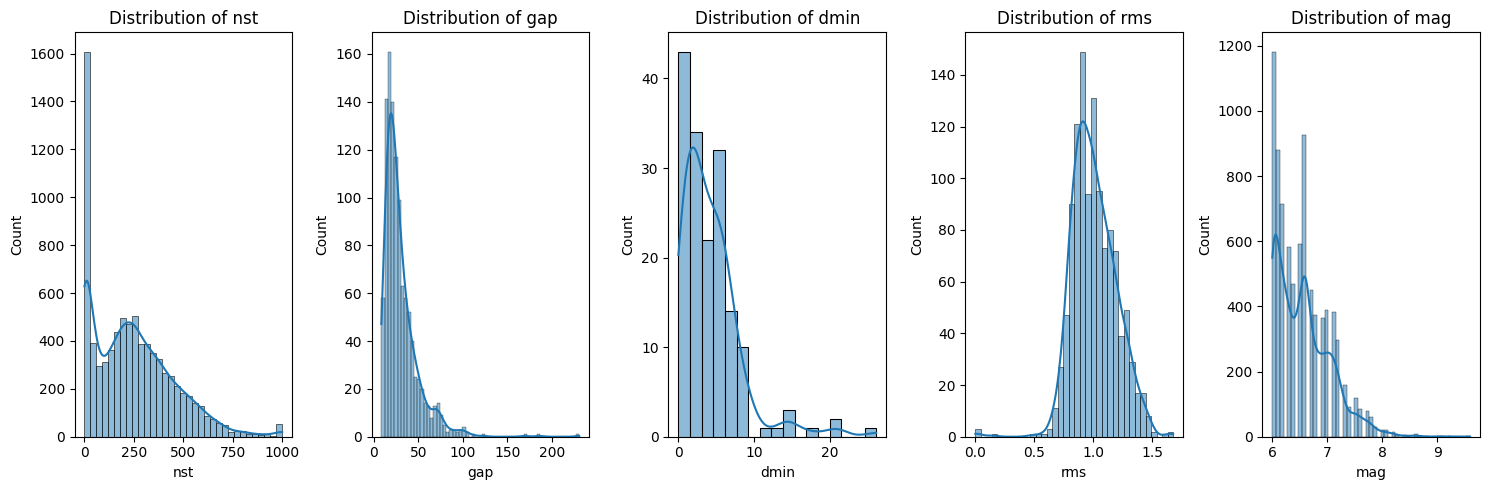

In [5]:
features = ['nst', 'gap', 'dmin','rms','mag']

# Create subplots
fig, axes = plt.subplots(1, len(features), figsize=(15,5))  # 1 row, multiple columns

# Loop through features and create visualizations
for i, feature in enumerate(features):
    sns.histplot(data[feature], kde=True, ax=axes[i])  # Histogram with KDE
    axes[i].set_title(f'Distribution of {feature}')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

In [6]:
#imputing the missing values with median
data['nst']=data['nst'].fillna(data['nst'].median())
data['gap']=data['gap'].fillna(data['gap'].median())
data['dmin']=data['dmin'].fillna(data['dmin'].median())
data['rms']=data['rms'].fillna(data['rms'].median())
data['mag']=data['mag'].fillna(data['mag'].median())

In [7]:
data['magType']=data['magType'].fillna(data['magType'].mode().iloc[0])
data['place']=data['place'].fillna(data['place'].mode().iloc[0])

THE CLASSIFIER

In [8]:
predict="magType"

In [9]:
data.dtypes

time                 object
Date         datetime64[ns]
Time                 object
latitude            float64
longitude           float64
depth               float64
mag                 float64
magType              object
nst                 float64
gap                 float64
dmin                float64
rms                 float64
net                  object
id                   object
updated              object
place                object
type                 object
dtype: object

In [10]:
data=data.drop(columns=["time","Date","Time","net","id","updated","place","type"],errors='ignore')
data.head(6)

,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms
0,-20.0030,-70.8741,17.0,6.2,mww,221.0,82.0,1.171,1.37
1,-19.9246,-70.6278,20.0,6.7,mww,221.0,44.0,0.929,1.16
2,-5.5660,-80.8790,9.8,6.3,mwp,221.0,90.0,6.253,1.00
3,-14.0935,-76.2968,20.0,6.1,mww,221.0,71.0,2.159,1.02
4,33.6793,131.8197,79.0,6.3,mwb,221.0,14.0,0.963,1.26
5,-3.1128,148.4774,10.0,6.1,mww,221.0,27.0,1.536,1.29
